In [41]:
#importamos el modulo de SimPy
import simpy

#definimos una funcion a llamar cuando ocurre un evento
def contador(ambiente):
    while True: #en un ciclo infinto
        print(ambiente.now) #imprime el 'tiempo' actual de la simulacion
        yield ambiente.timeout(1) #espera una unidad de 'tiempo'

ambiente = simpy.Environment() #inicializamos el ambiente de simulacion
ambiente.process(contador(ambiente)) #agregamos un proceso a la simulacion
ambiente.run(until=5) #ejecutamos la simulacion por 5 pasos
'''Nota: al alcanzar el tiempo limite de la simulacion (definido por 'until'),
 se detienen todos los procesos pendientes, aunque esten en un ciclo infinto'''

0
1
2
3
4


"Nota: al alcanzar el tiempo limite de la simulacion (definido por 'until'),\n se detienen todos los procesos pendientes, aunque esten en un ciclo infinto"

In [42]:
#importamos el modulo de SimPy
import simpy

#definimos una funcion a llamar cuando ocurre un evento
def contador(ambiente, nombre, inicio):
    yield ambiente.timeout(inicio) #espera un numero de pasos dado
    while True:
        print(f"{nombre}: {ambiente.now}") #imprime su nombre y el 'tiempo' actual
        yield ambiente.timeout(2) #espera dos pasos de la simulacion

ambiente = simpy.Environment() #inicializamos el ambiente de simulacion
ambiente.process(contador(ambiente, "impares", 1)) #agregamos un proceso a la simulacion
ambiente.process(contador(ambiente, "pares", 2)) #agregamos otro proceso a la simulacion
ambiente.run(until=6) #ejecutamos la simulacion por 6 pasos

impares: 1
pares: 2
impares: 3
pares: 4
impares: 5


In [43]:
#importamos el modulo de SimPy
import simpy

#definimos el primer proceso: un contador normal
def primero(ambiente):
    print("inicia primer proceso")
    for i in range(3):
        print(ambiente.now)
        yield ambiente.timeout(1)

#definimos el primer proceso: un contador modificado
def segundo(ambiente, anterior):
    yield anterior #espera a que termine el proceso 'anterior'
    print("inicia segundo proceso")
    while True:
        print(ambiente.now)
        yield ambiente.timeout(1)

ambiente = simpy.Environment() #inicializamos el ambiente de simulacion

#agregamos el primer proceso a la simulacion
primer_proceso = ambiente.process(primero(ambiente))

#agregamos el segundo a la simulacion, pasando la referencia al primero
ambiente.process(segundo(ambiente, primer_proceso))

ambiente.run(until=6) #ejecutamos la simulacion por 6 pasos

inicia primer proceso
0
1
2
inicia segundo proceso
3
4
5


In [44]:
#importamos el modulo de SimPy
import simpy

#definimos el proceso principal, que ejecuta procesos secundarios
def principal(ambiente):
    while True:
        yield ambiente.process(secundario("par", ambiente))
        yield ambiente.process(secundario("impar", ambiente))

#definimos el proceso secundario: un contador de un solo paso (con 'nombre')
def secundario(nombre, ambiente):
    print(f"{nombre}: {ambiente.now}")
    yield ambiente.timeout(1)

ambiente = simpy.Environment() #inicializamos el ambiente de simulacion

#agregamos el proceso principal a la simulacion
primer_proceso = ambiente.process(principal(ambiente))

ambiente.run(until=6) #ejecutamos la simulacion por 6 pasos

par: 0
impar: 1
par: 2
impar: 3
par: 4
impar: 5


In [45]:
#importamos el modulo de SimPy
import simpy

#definimos el proceso que sera interrumpido
def primero(ambiente):
    try: #las interrupciones se manejan como excepciones (en un bloque try-except)
        while True: #definimos un contador normal
            print(ambiente.now)
            yield ambiente.timeout(1)
    except simpy.Interrupt: #si el proceso es interrumpido, lo reporta y termina
        print("proceso interrumpido")

#definimos el proceso que realizara la interrupcion
def segundo(ambiente, otro):
    yield ambiente.timeout(5)
    otro.interrupt()

ambiente = simpy.Environment() #inicializamos el ambiente de simulacion

#agregamos el primer proceso a la simulacion
primer_proceso = ambiente.process(primero(ambiente))

#agregamos el segundo a la simulacion, pasando la referencia al primero
ambiente.process(segundo(ambiente, primer_proceso))

#ejecutamos la simulacion hasta que termine 
ambiente.run() #(sin limite de tiempo definido por until)

0
1
2
3
4
proceso interrumpido


In [46]:
#importamos el modulo de SimPy
import simpy

#definimos un proceso de contador que utiliza un recurso en cada iteracion
def contador(ambiente, nombre, recurso):
    while True:
        recurso_utilizado = recurso.request() #solicita el recurso
        yield recurso_utilizado #espera a obtener el recurso
        yield ambiente.timeout(1)
        print(f"{nombre}: {ambiente.now}")
        recurso.release(recurso_utilizado) #libera el recurso para que otro proceso pueda utilizarlo

ambiente = simpy.Environment() #inicializamos el ambiente de simulacion
recurso = simpy.Resource(ambiente, capacity=2) #creamos un recurso, indicando la capacidad

for i in range(4): #creamos un conjunto de procesos y agregamos cada uno a la simulacion
    ambiente.process(contador(ambiente, 'Proceso %d' % i, recurso))

ambiente.run(until=6) #ejecutamos la simulacion por 6 pasos

Proceso 0: 1
Proceso 1: 1
Proceso 2: 2
Proceso 3: 2
Proceso 0: 3
Proceso 1: 3
Proceso 2: 4
Proceso 3: 4
Proceso 0: 5
Proceso 1: 5


In [47]:
#importamos el modulo de SimPy
import simpy

#definimos un proceso de contador que utiliza un recurso en cada iteracion
def contador(ambiente, nombre, recurso):
    while True:
        with recurso.request() as recurso_utilizado: #solicita el recurso
            yield recurso_utilizado #espera a obtener el recurso
            yield ambiente.timeout(1)
            print(f"{nombre}: {ambiente.now}")
            #el recurso es liberado automaticamente al finalizar el bloque with

ambiente = simpy.Environment() #inicializamos el ambiente de simulacion
recurso = simpy.Resource(ambiente, capacity=2) #creamos un recurso, indicando la capacidad


for i in range(4): #creamos un conjunto de procesos y agregamos cada uno a la simulacion
    ambiente.process(contador(ambiente, 'Proceso %d' % i, recurso))

ambiente.run(until=6) #ejecutamos la simulacion por 6 pasos

Proceso 0: 1
Proceso 1: 1
Proceso 2: 2
Proceso 3: 2
Proceso 0: 3
Proceso 1: 3
Proceso 2: 4
Proceso 3: 4
Proceso 0: 5
Proceso 1: 5


In [48]:
#importamos el modulo de SimPy
import simpy

#definimos una clase
class Clase:
    #definicion del constructor de la clase
    def __init__(self, ambiente): #se recibe el ambiente de SimPy como parametro
        self.ambiente = ambiente
        #en el constructor se indica la funcion a ejecutar por defecto
        self.action = ambiente.process(self.contador())
    
    #definimos un contador como funcion de la clase
    def contador(self):
        try: #agregamos un bloque try para poder interrumpir la funcion
            while True:
                print(self.ambiente.now)
                yield self.ambiente.timeout(1)
        except simpy.Interrupt: #si el proceso es interrumpido, lo reporta y termina
            print("proceso interrumpido")


#definimos el proceso que realizara la interrupcion
def interruptor(ambiente, otro):
    yield ambiente.timeout(5)
    otro.action.interrupt() #se debe interrumpir al accion, no el objeto

ambiente = simpy.Environment() #inicializamos el ambiente de simulacion

#creamos un ejemplar de la clase
primer_proceso = Clase(ambiente)
'''Nota: como la instruccion process() esta en el constructor de la clase,
 no hace falta iniciar el proceso, sino que basta con construir el ejemplar '''

#agregamos el proceso interruptor a la simulacion, pasando la referencia al ejemplar
ambiente.process(interruptor(ambiente, primer_proceso))

#ejecutamos la simulacion hasta que termine 
ambiente.run() #(sin limite de tiempo definido por until)

0
1
2
3
4
proceso interrumpido


In [50]:
#importamos el modulo de SimPy
import simpy
import random

#definimos el primer proceso: un contador con duracion aleatoria
def contador_aleatorio(ambiente, nombre):
    duracion = random.randint(2,5) #definimos la duracion del proceso
    print(f"inicia proceso {nombre} (duracion: {duracion})") #reportamos inicio y duracion del proceso
    for i in range(duracion):
        print(f"{nombre}: {ambiente.now}")
        yield ambiente.timeout(1)
    print("termina proceso", nombre) #reportamos fin de proceso

#definimos el proceso que espera a que termine cualquiera de los anteriores
def espera_cualquiera(ambiente, anteriorA, anteriorB):
    yield anteriorA | anteriorB #espera a que termine cualquiera de los procesos anteriores
    print("inicia proceso C")
    for i in range(5):
        print("C:",ambiente.now)
        yield ambiente.timeout(1)
    print("termina proceso C")

#definimos el proceso que espera a que terminen todos los anteriores
def espera_ambos(ambiente, anteriorA, anteriorB):
    yield anteriorA & anteriorB #espera a que termine cualquiera de los procesos anteriores
    print("inicia proceso F")
    for i in range(5):
        print("F:",ambiente.now)
        yield ambiente.timeout(1)
    print("termina proceso F")
ambiente = simpy.Environment() #inicializamos el ambiente de simulacion

#agregamos dos procesos a la simulacion
procesoA = ambiente.process(contador_aleatorio(ambiente, "A"))
procesoB = ambiente.process(contador_aleatorio(ambiente, "B"))

#agregamos el proceso que espera a los otros a la simulacion
ambiente.process(espera_cualquiera(ambiente, procesoA, procesoB))

ambiente.run() #ejecutamos la simulacion hasta que todos los procesos activos terminen
'''nota: despues de terminar la ejecucion, podemos agregar mas procesos
y continuar con una nueva ejecucion'''
print ("\n")

procesoD = ambiente.process(contador_aleatorio(ambiente, "D"))
procesoE = ambiente.process(contador_aleatorio(ambiente, "E"))

ambiente.process(espera_ambos(ambiente, procesoD, procesoE))

ambiente.run() #ejecutamos la simulacion hasta que todos los procesos activos terminen

inicia proceso A (duracion: 5)
A: 0
inicia proceso B (duracion: 3)
B: 0
A: 1
B: 1
A: 2
B: 2
A: 3
termina proceso B
inicia proceso C
C: 3
A: 4
C: 4
termina proceso A
C: 5
C: 6
C: 7
termina proceso C


inicia proceso D (duracion: 4)
D: 8
inicia proceso E (duracion: 4)
E: 8
D: 9
E: 9
D: 10
E: 10
D: 11
E: 11
termina proceso D
termina proceso E
inicia proceso F
F: 12
F: 13
F: 14
F: 15
F: 16
termina proceso F


In [51]:
#importamos el modulo de SimPy
import simpy
import random

#definimos el proceso hijo: un contador que regresa un dato aleatorio
def hijo(ambiente, nombre):
    dato = random.randint(2,5) #definimos el dato a regresar
    print(f"inicia proceso {nombre} (dato: {dato})") #reportamos inicio y dato del proceso
    for i in range(3): # contamos por 3 pasos
        print(f"{nombre}: {ambiente.now}")
        yield ambiente.timeout(1)
    return dato 

#definimos el proceso padre: crea 2 procesos hijos, los espera y recibe sus datos
def padre(ambiente):
    hijoA = ambiente.process(hijo(ambiente, "A")) #creamos un proceso hijo
    valorA = yield hijoA #eperamos al hijo y recibimos su valor de retorno
    
    hijoB = ambiente.process(hijo(ambiente, "B")) #creamos dos procesos hijos nuevos
    hijoC = ambiente.process(hijo(ambiente, "C"))
    valorB, valorC =(yield hijoB & hijoC).values() #esperamos a los hijos y recibimos sus valores
    '''nota: al recibir varios valores, debemos extraerlos usando la fncion values()'''
    
    print(f"valores: {valorA}, {valorB}, {valorC}") #imprimimos los valores recibidos
    
ambiente = simpy.Environment() #inicializamos el ambiente de simulacion

#agregamos el padrea la simulacion
ambiente.process(padre(ambiente))

ambiente.run() #ejecutamos la simulacion hasta que todos los procesos activos terminen

inicia proceso A (dato: 2)
A: 0
A: 1
A: 2
inicia proceso B (dato: 3)
B: 3
inicia proceso C (dato: 2)
C: 3
B: 4
C: 4
B: 5
C: 5
valores: 2, 3, 2


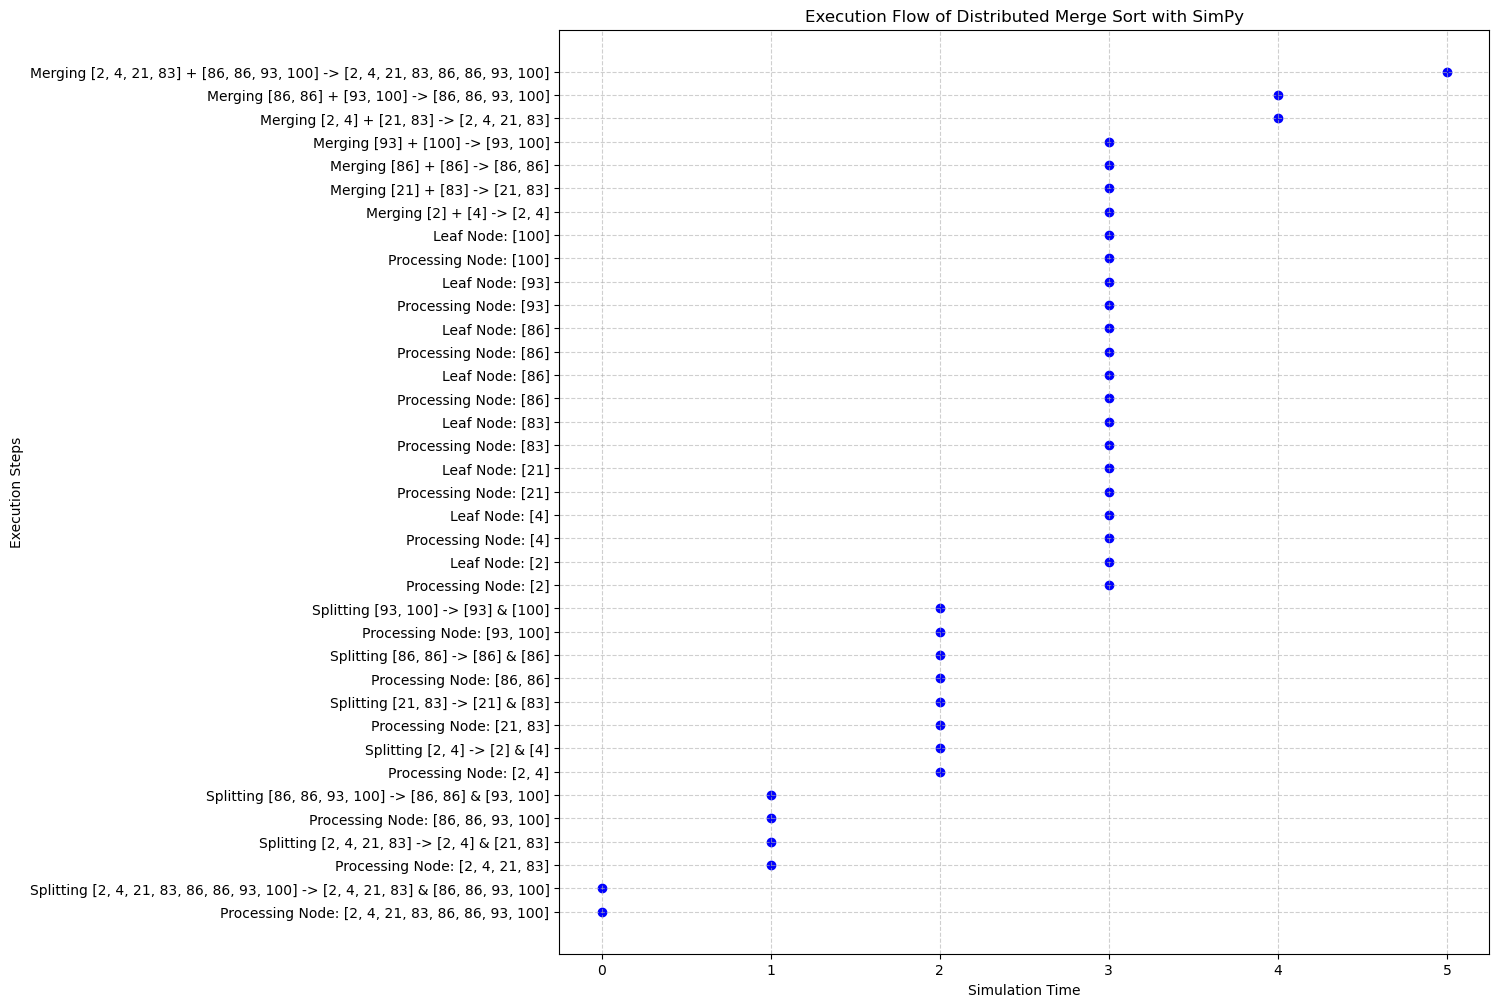

In [4]:
import random
import simpy
import math
import matplotlib.pyplot as plt

# Registro de eventos para visualización
execution_log = []

class Node:
    def __init__(self, value):
        self.value = value  # Node value (array)
        self.children = 0  # Number of children nodes
        self.parent = None  # Parent node

class Tree:
    def __init__(self, env, root_value=None):
        self.env = env
        self.root_value = Node(root_value) if root_value is not None else None
        self.root_children = 2 if len(self.root_value.value) != 1 else 0

    def generateNodes(self, node):
        """Generates nodes in a truly distributed manner using SimPy."""
        execution_log.append((self.env.now, f"Processing Node: {node.value}"))

        if len(node.value) == 1:
            execution_log.append((self.env.now, f"Leaf Node: {node.value}"))
            return

        arr = node.value
        leftArr = arr[: len(arr) // 2]
        rightArr = arr[len(arr) // 2:]

        leftNode = Node(leftArr)
        rightNode = Node(rightArr)

        leftNode.parent, rightNode.parent = node, node
        execution_log.append((self.env.now, f"Splitting {node.value} -> {leftArr} & {rightArr}"))

        yield self.env.timeout(1)  # Simulate delay for node processing
        left_process = self.env.process(self.generateNodes(leftNode))
        right_process = self.env.process(self.generateNodes(rightNode))
        yield left_process & right_process

        merged_message = self.merge_messages(leftNode.value, rightNode.value)
        node.value = merged_message  # Store the sorted list in the parent node
        execution_log.append((self.env.now, f"Merging {leftNode.value} + {rightNode.value} -> {merged_message}"))
        yield self.env.timeout(1)

    def merge_messages(self, message1, message2):
        """Merges two sorted subarrays."""
        merged = []
        i, j = 0, 0

        while i < len(message1) and j < len(message2):
            if message1[i] < message2[j]:
                merged.append(message1[i])
                i += 1
            else:
                merged.append(message2[j])
                j += 1

        merged.extend(message1[i:])
        merged.extend(message2[j:])
        return merged

# Initialize environment and tree
env = simpy.Environment()
arr = sorted([random.randint(0, 100) for _ in range(8)])  # Sorted array for clear visualization
tree = Tree(env, arr)
env.process(tree.generateNodes(tree.root_value))

# Run simulation
env.run()

# Visualizing the Execution Flow
times, events = zip(*execution_log)
plt.figure(figsize=(12, 12))
plt.scatter(times, range(len(events)), color="blue")
plt.yticks(range(len(events)), events, fontsize=10)
plt.xlabel("Simulation Time")
plt.ylabel("Execution Steps")
plt.title("Execution Flow of Distributed Merge Sort with SimPy")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [5]:
import simpy

def process_1(env):
    yield env.timeout(3)
    print(f"Process 1 finished at {env.now}")

def process_2(env):
    yield env.timeout(5)
    print(f"Process 2 finished at {env.now}")

def main_process(env):
    p1 = env.process(process_1(env))
    p2 = env.process(process_2(env))

    print(f"Waiting for both processes at {env.now}")
    yield p1 & p2  # Espera a que ambos terminen
    print(f"Both processes finished at {env.now}")

env = simpy.Environment()
env.process(main_process(env))
env.run()


Waiting for both processes at 0
Process 1 finished at 3
Process 2 finished at 5
Both processes finished at 5
